In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Customer_Value\data\st_sample_similar_all.csv')

Separate Churn and Active sample for scatter

In [ ]:
df_list = [group[1] for group in df.groupby(df['sample_no'])]
active_list = [d for d in df_list if d['LABEL_CHURN'].iloc[-1] == 'ACTIVE']
churn_list = [d for d in df_list if d['LABEL_CHURN'].iloc[-1] == 'CHURN']

Active Trading/Asset Scatter

In [ ]:
for i in range(30):
    plt.figure()
    plt.scatter(x=active_list[i]['MTH_DATE'], y=active_list[i]['AMT_S'])
    plt.scatter(x=active_list[i]['MTH_DATE'], y=active_list[i]['AMT_B'])

In [ ]:
for i in range(30):
    plt.figure()
    plt.scatter(x=active_list[i]['MTH_DATE'], y=active_list[i]['ST_ASSET'])

Churn Trading/Asset Scatter

In [ ]:
for i in range(30):
    plt.figure()
    plt.scatter(x=churn_list[i]['MTH_DATE'], y=churn_list[i]['AMT_S'])
    plt.scatter(x=churn_list[i]['MTH_DATE'], y=churn_list[i]['AMT_B'])

In [ ]:
for i in range(30):
    plt.figure()
    plt.scatter(x=churn_list[i]['MTH_DATE'], y=churn_list[i]['ST_ASSET'])

Separate Churn and Active sample for Distribution

In [4]:
df_list = [group[1] for group in df.groupby(df['sample_no'])]
d = pd.concat([pd.DataFrame(data.iloc[-1]).transpose() for data in df_list], axis=0)
churn = d[d.LABEL_CHURN == 'CHURN']
active = d[d.LABEL_CHURN == 'ACTIVE']

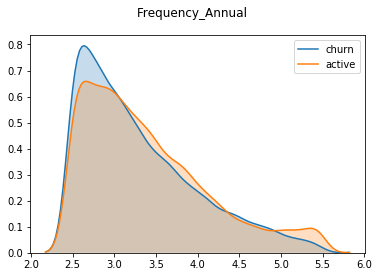

In [5]:
fig = sns.kdeplot(np.log(churn['frequency_annual'].astype(np.float64)), shade=True, legend=False)
fig = sns.kdeplot(np.log(active['frequency_annual'].astype(np.float64)), shade=True, legend=False)
fig.legend(labels=['churn','active'])
fig.figure.suptitle("Frequency_Annual", fontsize = 12)
plt.show()

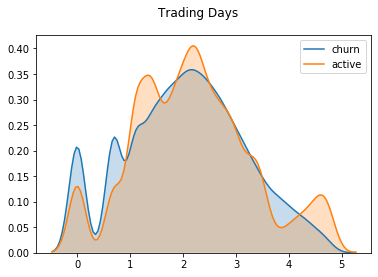

In [6]:
fig = sns.kdeplot(np.log(churn['trading_days_total_120_days'].astype(np.float64)), shade=True, legend=False)
fig = sns.kdeplot(np.log(active['trading_days_total_120_days'].astype(np.float64)), shade=True, legend=False)
fig.legend(labels=['churn','active'])
fig.figure.suptitle("Trading Days", fontsize = 12)
plt.show()

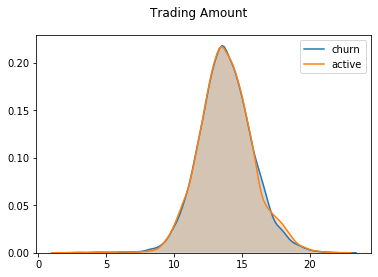

In [7]:
fig = sns.kdeplot(np.log(churn['trading_days_amount_120_days'].astype(np.float64)), shade=True, legend=False)
fig = sns.kdeplot(np.log(active['trading_days_amount_120_days'].astype(np.float64)), shade=True, legend=False)
fig.legend(labels=['churn','active'])
fig.figure.suptitle("Trading Amount", fontsize = 12)
plt.show()

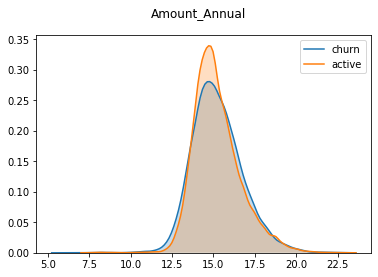

In [8]:
fig = sns.kdeplot(np.log(churn['amount_annual'].astype(np.float64)), shade=True, legend=False)
fig = sns.kdeplot(np.log(active['amount_annual'].astype(np.float64)), shade=True, legend=False)
fig.legend(labels=['churn','active'])
fig.figure.suptitle("Amount_Annual", fontsize = 12)
plt.show()

C:\Users\011553\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\011553\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\011553\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\011553\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


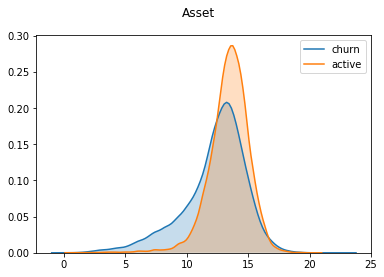

In [9]:
fig = sns.kdeplot(np.log(churn['ST_ASSET'].astype(np.float64)), shade=True, legend=False)
fig = sns.kdeplot(np.log(active['ST_ASSET'].astype(np.float64)), shade=True, legend=False)
fig.legend(labels=['churn','active'])
fig.figure.suptitle("Asset", fontsize = 12)
plt.show()

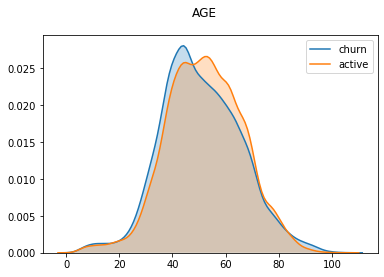

In [10]:
fig = sns.kdeplot(churn['AGE'], shade=True, legend=False)
fig = sns.kdeplot(active['AGE'], shade=True, legend=False)
fig.legend(labels=['churn','active'])
fig.figure.suptitle("AGE", fontsize = 12)
plt.show()

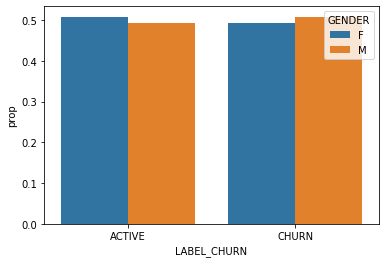

In [11]:
x, y, hue = "LABEL_CHURN", "prop", "GENDER"
hue_order = ["M", "F"]
prop_df = (d[x]
           .groupby(d[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
sns.barplot(x=x, y=y, hue=hue, data=prop_df)

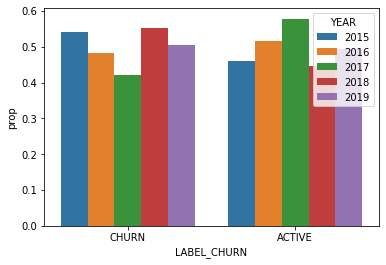

In [12]:
x, y, hue = "LABEL_CHURN", "prop", "YEAR"
hue_order = ['2015', '2016', '2017', '2018', '2019']
prop_df = (d[x]
           .groupby(d[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
sns.barplot(x=x, y=y, hue=hue, data=prop_df)